# Sheet 1
Berkay Günes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import time

## 1) KL-divergence
$$ \begin{aligned}
D_{KL}[N_{\mu_1, \sigma_1}(x), N_{\mu_2, \sigma_2}(x)] &= \int{N_{\mu_1, \sigma_1}(x) \log{\bigg(\frac{N_{\mu_1, \sigma_1}(x)}{N_{\mu_2, \sigma_2}(x)}\bigg)}dx} \\
&= \int{\frac1{\sqrt{2\pi\sigma_1^2}} \exp{\bigg(-\frac{(x-\mu_1)^2}{2\sigma_1^2}\bigg)} \log{\big( \frac{\sigma_2}{\sigma_1} \big) } \bigg( \frac{(x-\mu_2)^2}{2\sigma_2^2} - \frac{(x-\mu_1)^2}{2\sigma_1^2}\bigg)dx}
\end{aligned} $$
In case of $\mu_1 = \mu_2$ and $\sigma_1 = \sigma_2$, we have:
$$ \begin{aligned}
\log{\big( \frac{\sigma_2}{\sigma_1} \big) } = 0 \\
=> D_{KL}[N_{\mu_1, \sigma_1}(x), N_{\mu_2, \sigma_2}(x)] = 0
\end{aligned} $$
If two distributions fully overlap, then the KL-divergence is vanishes.

## 2) Random numbers

(a) <br> 
The relation between the cumulative density functions of f and g is:
$$ \begin{aligned}
F(x) &= \int_{-\infty}^{x} f(x)dx \\
G(x) &= \int_{-\infty}^{x} g(x)dx
\end{aligned} $$

(b) Inverse Transform Sampling

In [2]:
N = 100000
r = np.random.rand(N)

TODO: Derive expression for $G^{-1}(F(x))$

Generated 100000 random numbers in 0.0030 s


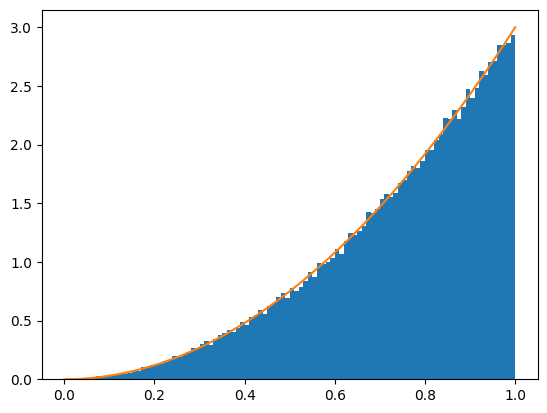

In [3]:
t0 = time.time()

# TODO: Calculate x following g1
x = r**(1/3)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,1)
plt.hist(x, range=(0,1), bins=100, density=True)
plt.plot(x0, 3*x0**2)
plt.show()

TODO: Derive expression for $G^{-1}(F(x))$

Generated 100000 random numbers in 0.0010 s


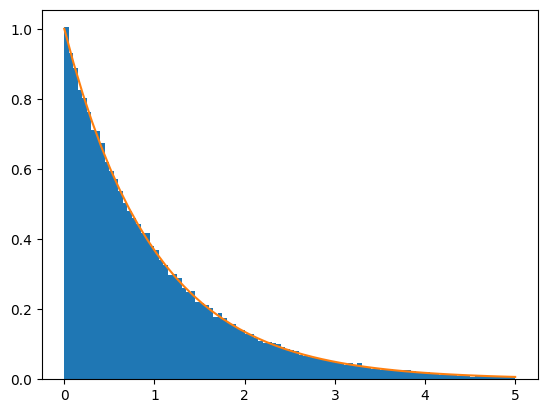

In [4]:
t0 = time.time()

# TODO: Calculate x following g2
x = - np.log(1-r)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, np.exp(-x0))
plt.show()

TODO: Derive expression for $G^{-1}(F(x))$

Generated 100000 random numbers in 0.0029 s


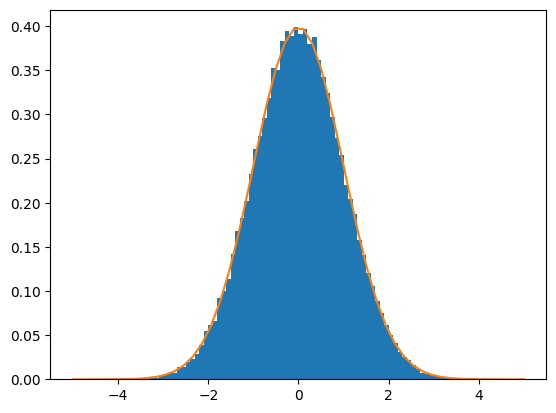

In [5]:
t0 = time.time()

# TODO: Calculate x following g3
x = -2**0.5 * sp.erfinv(2*r-1)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

TODO: Derive expression for $G^{-1}(F(x))$

Generated 100000 random numbers in 0.0003 s


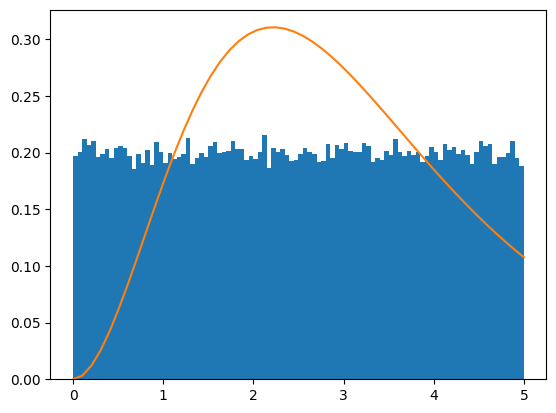

In [6]:
t0 = time.time()

# TODO: Calculate x following g4
# You do not have to evaluate the zeta function 
x = r * 5

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, 2/(3*sp.zeta(3)) * x0**2/(np.exp(x0)+1) 
         / 0.862177) # correction factor for limited x range
plt.show()

There is no straight forward way to derive the inverse of g4.

(c) rejection sampling

In [7]:
g_accept = np.random.rand(N)

Generated 61553 random numbers in 0.0010 s


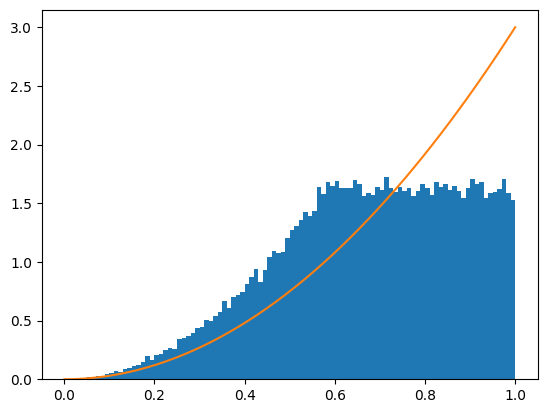

In [8]:
t0 = time.time()

# TODO: Generate random numbers following g1
x_proposal = r
x = x_proposal[g_accept < 3*(x_proposal**2)]

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,1)
plt.hist(x, range=(0,1), bins=100, density=True)
plt.plot(x0, 3*x0**2)
plt.show()

Generated 20061 random numbers in 0.0014 s


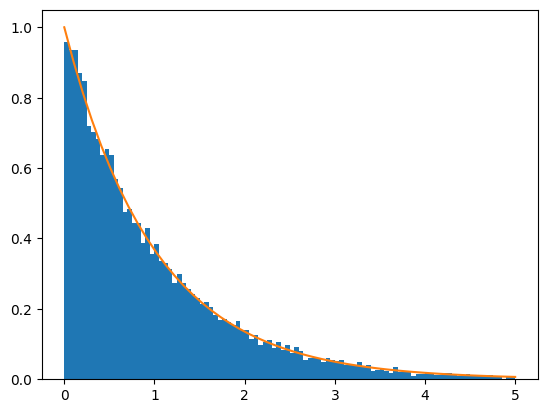

In [9]:
t0 = time.time()

# TODO: Generate random numbers following g2
x_proposal = 5*r
x = x_proposal[g_accept < np.exp(-x_proposal)]

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, np.exp(-x0))
plt.show()

Generated 9923 random numbers in 0.0017 s


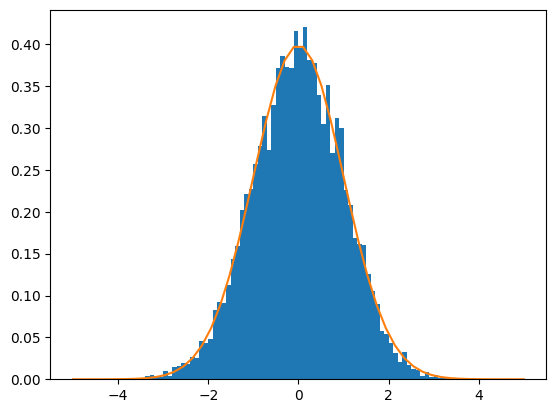

In [10]:
t0 = time.time()

# TODO: Generate random numbers following g3
x_proposal = 10*r -5
x = x_proposal[g_accept < 1/(2*np.pi)**.5 * np.exp(-x_proposal**2/2)]

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

Generated 17088 random numbers in 0.0016 s


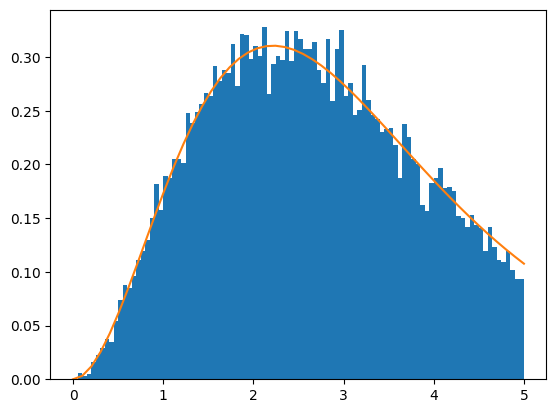

In [11]:
t0 = time.time()

# TODO: Generate random numbers following g4
# You do not have to evaluate the zeta function 
x_proposal = 5*r
x =  x_proposal[g_accept < 2/(3*sp.zeta(3)) * x_proposal**2/(np.exp(x_proposal)+1)]

t1 = time.time()

print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, 2/(3*sp.zeta(3)) * x0**2/(np.exp(x0)+1) 
         / 0.862177) 
# Note: Need the correction factor 0.862177 = \int_0^5 dx g_4(x) 
# to get the correct normalization
plt.show()

Rejection sampling has the benefit of being applicable to any distribution, but it is not very efficient. Inverse transform sampling is more efficient, but it is not applicable to any distribution. <br>
The efficiency of rejection sampling depends on the ratio of the area under the curve of the target distribution to the area under the curve of the proposal distribution. The closer this ratio is to 1, the more efficient the rejection sampling is.

(d) Box-Muller transform

Generated 100000 random numbers in 0.0017 s


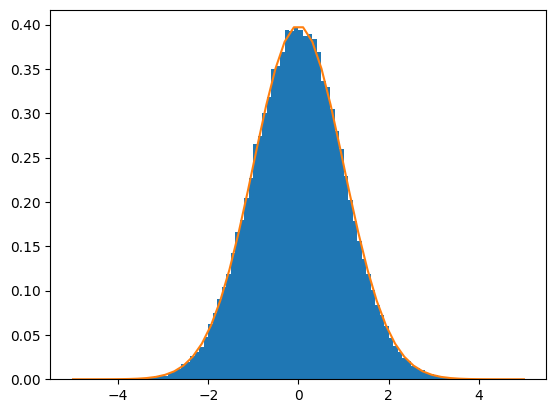

In [12]:
x_1 = np.random.rand(N)
x_2 = np.random.rand(N)

t0 = time.time()

# TODO: Transform r into gaussian random numbers, but fast
x = np.sqrt(-2 * np.log(x_1)) * np.cos(2 * np.pi * x_2)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

## 3) Neyman-Pearson Lemma

To prove the Neyman-Pearson Lemma, we'll show that for a given size of the test, the likelihood ratio test statistic, denoted as $t_{LR}(x)$, maximizes the power of the test. We'll use a proof by contradiction.

Suppose we have a hypothesis test with the rejection region $\omega$ defined by a test statistic $t(x)$ and a cutoff value $t_0$, such that:

- Rejection region: $\omega = {x | t(x) > t_0}$.
- Size of the test: $p(\omega | H_0) = \alpha (a \text{ constant})$.

We want to show that the likelihood ratio test statistic $t_{LR}(x) = p(x | H_1) / p(x | H_0)$ maximizes the power of the test for the given size $\alpha$. The power of the test is defined as $p(\omega | H_1)$.

Now, let's consider a modified rejection region $\omega '$ defined by a modified test statistic $t'(x)$, where we add a region A and remove a region B such that the size of the test remains constant:

- Modified rejection region: $\omega' = {x | t'(x) > t_0}$.
- Size of the test: $p(\omega' | H_0) = \alpha (\text{the size remains the same})$.

We want to compare the power of the modified test to the original test:

$$p(\omega' | H_1) - p(\omega | H_1)$$

Let A be the region added $(A ⊆ \omega')$, and B be the region removed $(B ⊆ \omega)$. Now, consider the following:

$$p(\omega' | H_1) - p(\omega | H_1) = p(A | H_1) - p(B | H_1)$$

We have $p(\omega' | H_0) = p(\omega | H_0) = \alpha$, so we'll use the likelihood ratio test for the modified test:

$$t'(x) = p(x | H_1) / p(x | H_0)$$

Now, let's examine the difference in power:

$$p(\omega' | H_1) - p(\omega | H_1) = p(A | H_1) - p(B | H_1)$$

We know that the power $p(A | H1)$ for the region A is greater than or equal to zero because we're rejecting more points in the modified test $\omega'$. At the same time, $p(B | H_1)$ for the region B is less than or equal to zero because we're rejecting fewer points in the modified test $\omega'$. Therefore:

$$p(\omega' | H_1) - p(\omega | H_1) = p(A | H_1) - p(B | H_1) ≥ 0$$

This implies that modifying the rejection region by adding region A and removing region B does not increase the power of the test. Since this argument holds for any modification of the rejection region that keeps the size $\alpha$ constant, it demonstrates that the likelihood ratio test statistic $t_{LR}(x)$ maximizes the power of the test for a given size $\alpha$, proving the Neyman-Pearson Lemma.
